In [1]:
import pandas as pd
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import random as r

In [2]:
calendar_dates = pd.read_csv("data/gtfs_subway/calendar_dates.txt")
calendar = pd.read_csv("data/gtfs_subway/calendar.txt")

stop_times = pd.read_csv("data/gtfs_subway/stop_times.txt")
trips = pd.read_csv("data/gtfs_subway/trips.txt")
routes = pd.read_csv("data/gtfs_subway/routes.txt")
stops = pd.read_csv("data/gtfs_subway/stops.txt")
transfers = pd.read_csv("data/gtfs_subway/transfers.txt")

In [3]:
print(sorted(list(stops["stop_name"].unique())))
print(len(stops["stop_name"].unique()))

['1 Av', '103 St', '103 St-Corona Plaza', '104 St', '110 St', '110 St-Malcolm X Plaza', '111 St', '116 St', '116 St-Columbia University', '121 St', '125 St', '135 St', '137 St-City College', '138 St-Grand Concourse', '14 St', '14 St-Union Sq', '145 St', '149 St-Grand Concourse', '15 St-Prospect Park', '155 St', '157 St', '161 St-Yankee Stadium', '163 St-Amsterdam Av', '167 St', '168 St', '168 St-Washington Hts', '169 St', '170 St', '174 St', '174-175 Sts', '175 St', '176 St', '18 Av', '18 St', '181 St', '182-183 Sts', '183 St', '190 St', '191 St', '2 Av', '20 Av', '207 St', '21 St', '21 St-Queensbridge', '215 St', '219 St', '225 St', '23 St', '231 St', '233 St', '238 St', '25 Av', '25 St', '28 St', '3 Av', '3 Av-138 St', '3 Av-149 St', '30 Av', '33 St', '33 St-Rawson St', '34 St-Herald Sq', '34 St-Hudson Yards', '34 St-Penn Station', '36 Av', '36 St', '39 Av-Dutch Kills', '4 Av-9 St', '40 St-Lowery St', '42 St-Bryant Pk', '42 St-Port Authority Bus Terminal', '45 St', '46 St', '46 St-Bl

In [4]:
# {stop_id : stop_name}
stops_dict = {}
for _, row in stops.iterrows(): 
    # if row["stop_name"] == "74 St-Broadway" or row["stop_name"] == "Jackson Hts-Roosevelt Av":
    #     stops_dict[row["stop_id"]] = "74-Broadway-Jackson Hts-Roosevelt Av"
    # elif row["stop_name"] == "Broadway-Lafayette St" or row["stop_name"] == "Bleecker St":
    #     stops_dict[row["stop_id"]] = "Broadway-Lafayette St-Bleecker St"
    # elif row["stop_name"] == "Brooklyn Bridge-City Hall": # or row["stop_name"] == "Chambers St":
    #     stops_dict[row["stop_id"]] = "Brooklyn Bridge-City Hall-Chambers St"
    # elif row["stop_name"] == "42 St-Bryant Pk":# or row["stop_name"] == "5 Av":
    #     stops_dict[row["stop_id"]] = "Bryant Pk-5 Av"
    if row["stop_name"] == "Cathedral Pkwy (110 St)":
        stops_dict[row["stop_id"]] = "Cathedral Pkwy"
    elif row["stop_name"] == "110 St-Malcolm X Plaza":
        stops_dict[row["stop_id"]] = "Central Park North"
    # elif row["stop_name"] == "Cortlandt St": #or row["stop_name"] == "WTC Cortlandt" or row["stop_name"] == "Park Pl" or row["stop_name"] == "Chambers St":
    #     stops_dict[row["stop_id"]] = "Chambers St-WTC-Park Pl-Cortlandt"
    elif row["stop_name"] == "Christopher St-Stonewall":
        stops_dict[row["stop_id"]] = "Christopher St-Sheridan Sq"
    # elif row["stop_name"] == "Court St" or row["stop_name"] == "Borough Hall":
    #     stops_dict[row["stop_id"]] = "Court St-Borough Hall"
    # elif row["stop_name"] == "Botanic Garden":
    #     stops_dict[row["stop_id"]] = "Franklin Av-Botanic Garden"
    elif row["stop_name"] == "Jamaica Center-Parsons/Archer":
        stops_dict[row["stop_id"]] = "Jamaica Center-Parsons-Archer"
    # elif row["stop_name"] == "Lexington Av/59 St":
    #     stops_dict[row["stop_id"]] = "Lexington Av-59 St"
    # elif row["stop_name"] == "Lexington Av/53 St" or row["stop_name"] == "51 St":
    #     stops_dict[row["stop_id"]] = "Lexington Av-53 St-51 St"
    # elif row["stop_name"] == "Lexington Av/63 St":
    #     stops_dict[row["stop_id"]] = "Lexington Av-63 St"
    # elif row["stop_name"] == "Metropolitan Av":
    #     stops_dict[row["stop_id"]] = "Lorimer St-Metropolitan Av"
    elif row["stop_name"] == "Whitehall St-South Ferry":
        stops_dict[row["stop_id"]] = "South Ferry-Whitehall St"
    # elif row["stop_name"] == "Times Sq-42 St":
    #     stops_dict[row["stop_id"]] = "Times Sq-42 St-42 St"
    # elif row["stop_name"] == "New Utrecht Av" or row["stop_name"] == "62 St":
    #     stops_dict[row["stop_id"]] = "New Utrecht Av-62 St"
    # elif row["stop_name"] == "53 St":
    #     if r.random() > 0.5:
    #         stops_dict[row["stop_id"]] = "5 Av-53 St"
    # elif row["stop_name"] == "59 St":
    #     stops_dict[row["stop_id"]] = "5 Av-59 St"
    # elif row["stop_name"] == "" or row["stop_name"] == "":
    #     stops_dict[row["stop_id"]] = ""
    # elif row["stop_name"] == "" or row["stop_name"] == "":
    #     stops_dict[row["stop_id"]] = ""
    # elif row["stop_name"] == "" or row["stop_name"] == "":
    #     stops_dict[row["stop_id"]] = ""
    # elif row["stop_name"] == "" or row["stop_name"] == "":
    #     stops_dict[row["stop_id"]] = ""
    # elif row["stop_name"] == "" or row["stop_name"] == "":
    #     stops_dict[row["stop_id"]] = ""
    else:
        stops_dict[row["stop_id"]] = row["stop_name"]
    # stops_dict[row["stop_id"]] = row["stop_name"]

In [5]:
#{trip id: {stop_name : sequence number}}

trips_dict = {}
for _, row in tqdm(stop_times.iterrows()): 
    if row["trip_id"] in trips_dict.keys(): 
        trips_dict[row["trip_id"]][stops_dict[row["stop_id"]]] = row["stop_sequence"]
    else: 
        trips_dict[row["trip_id"]] = {stops_dict[row["stop_id"]]: row["stop_sequence"]}

for trip_id, stops in trips_dict.items():
    # sort by stop_sequence (the value)
    sorted_stops = [stop_name for stop_name, _ in sorted(stops.items(), key=lambda x: x[1])]
    trips_dict[trip_id] = sorted_stops

562083it [00:31, 17735.63it/s]


In [6]:
big_set = set()
for t in trips_dict.keys(): 
    for h in trips_dict[t]: 
        big_set.add(h)

print(len(big_set))
print(big_set)

378
{'Avenue M', '51 St', 'Whitlock Av', '77 St', 'Jamaica-Van Wyck', 'Crescent St', 'Chauncey St', '5 Av/53 St', 'W 8 St-NY Aquarium', 'Marble Hill-225 St', 'Neptune Av', 'Van Siclen Av', 'Court St', 'Flushing-Main St', 'Fordham Rd', '40 St-Lowery St', 'Old Town', 'Classon Av', '135 St', 'Aqueduct-N Conduit Av', 'Crown Hts-Utica Av', 'Gun Hill Rd', 'Chambers St', 'Lafayette Av', '14 St-Union Sq', '21 St', '82 St-Jackson Hts', 'Grasmere', '80 St', 'Bedford Park Blvd', 'Prince St', 'Myrtle-Willoughby Avs', 'Dyckman St', '45 St', 'Rockaway Blvd', 'Gates Av', 'Hunts Point Av', 'Tottenville', 'Eastchester-Dyre Av', 'St George', '174 St', '168 St-Washington Hts', '55 St', 'Pennsylvania Av', 'Parkchester', 'Atlantic Av-Barclays Ctr', 'Times Sq-42 St', 'Wakefield-241 St', 'Grand St', '3 Av-138 St', '18 St', '116 St', '62 St', 'Beverley Rd', 'Beach 36 St', 'Houston St', '3 Av', 'Fresh Pond Rd', '5 Av', '69 St', 'Kew Gardens-Union Tpke', '36 St', 'Forest Av', 'Union St', 'Mosholu Pkwy', '96 St'

In [7]:
# {route_id : [trip_id1, trip_id2, ...]}

routes_dict = {}
# for trip_id in tqdm(trips_dict.keys()): 
for i, row in tqdm(trips.iterrows()): 
    trip_id = row["trip_id"]
    route_id = row["route_id"]

    if route_id in routes_dict.keys(): 
        routes_dict[route_id].append(trip_id)
    else: 
        routes_dict[route_id] = [trip_id]

20287it [00:00, 20494.88it/s]


In [8]:
# {route_id : [stopname1, stopname2, ...]}

route_stops = {}

for route_id, trip_ids in routes_dict.items():
    ref_trip = trips_dict[trip_ids[0]]

    for tid in trip_ids[1:]:
        trip_stops = trips_dict[tid]
        if len(trip_stops) > len(ref_trip):
            ref_trip = trip_stops
    
    route_stops[route_id] = ref_trip

In [ ]:
# using all trips per route_id
G = nx.Graph()

for route_id, trip_ids in routes_dict.items():
    for trip in trip_ids:
        stops = trips_dict[trip]
        for i in range(len(stops) - 1):
            src, dst = stops[i], stops[i + 1]
            G.add_edge(src, dst, route=route_id)

for _, row in transfers.iterrows(): 
    if stops_dict[row["from_stop_id"]] != stops_dict[row["to_stop_id"]]:
        G.add_edge(stops_dict[row["from_stop_id"]], stops_dict[row["to_stop_id"]])


rename_map = {
    "WTC Cortlandt": "WTC",
    "74 St-Broadway": "74-Broadway",
    "Cortlandt St": "Cortlandt",
    "Lexington Av/53 St": "Lexington Av-53 St",
    "5 Av/53 St": "5 Av-53 St",
    "5 Av/59 St": "5 Av-59 St"
}

nx.relabel_nodes(G, rename_map, copy=False)

merge_pairs = [
    ("Lexington Av-53 St", "51 St"),
    ("Times Sq-42 St", "42 St-Port Authority Bus Terminal"), # NEEDS RENAMING
    ("42 St-Bryant Pk", "5 Av"), # NEEDS RENAMING
    ("14 St", "8 Av"),
    ("14 St", "6 Av"),
    ("Broadway-Lafayette St", "Bleecker St"),
    ("Brooklyn Bridge-City Hall", "Chambers St"),
    ("Chambers St", "WTC"),
    ("Chambers St-WTC", "Park Pl"),
    ("Chambers St-WTC-Park Pl", "Cortlandt"), # ALSO NEEDS RENAMING
    ("Court Sq-23 St", "Court Sq"),
    ("74-Broadway", "Jackson Hts-Roosevelt Av"),
    ("Lorimer St", "Metropolitan Av"),
    ("Court St", "Borough Hall"),
    ("Franklin Av", "Botanic Garden"),
    ("New Utrecht Av", "62 St"),
]

to_remove = set()

for src, dst in merge_pairs:
    combined_name = f"{src}-{dst}"
    G.add_node(combined_name)

    for neighbor in list(G.neighbors(dst)):
        if neighbor not in (src, combined_name):
            attrs = G[dst][neighbor]
            G.add_edge(combined_name, neighbor, **attrs)

    for neighbor in list(G.neighbors(src)):
        if neighbor not in (dst, combined_name):
            attrs = G[src][neighbor]
            G.add_edge(combined_name, neighbor, **attrs)

    # record for later removal
    to_remove.update([src, dst])


rename_map = {
    "Lexington Av/59 St": "Lexington Av-59 St",
    "Lexington Av/63 St": "Lexington Av-63 St",
    "Times Sq-42 St-42 St-Port Authority Bus Terminal": "Times Sq-42 St-42 St",
    "42 St-Bryant Pk-5 Av": "Bryant Pk-5 Av",
    "WTC":"WTC Cortlandt"
}

nx.relabel_nodes(G, rename_map, copy=False)
print(f"Graph has {G.number_of_nodes()} stations and {G.number_of_edges()} connections.")

nx.write_gml(G, "data/subway_graph.gml")

Graph has 395 stations and 708 connections.


In [10]:
# using 1 (longest) trip per route_id
# G = nx.Graph()

# for route_id, stops in route_stops.items():
#     for i in range(len(stops) - 1):
#         src, dst = stops[i], stops[i + 1]
#         G.add_edge(src, dst, route=route_id)

# for _, row in transfers.iterrows(): 
#     if stops_dict[row["from_stop_id"]] != stops_dict[row["to_stop_id"]]:
#         G.add_edge(stops_dict[row["from_stop_id"]], stops_dict[row["to_stop_id"]])


# print(f"Graph has {G.number_of_nodes()} stations and {G.number_of_edges()} connections.")

# nx.write_gml(G, "data/subway_graph.gml")


In [11]:
print(sorted(list(G.nodes)))

['1 Av', '103 St', '103 St-Corona Plaza', '104 St', '110 St', '111 St', '116 St', '116 St-Columbia University', '121 St', '125 St', '135 St', '137 St-City College', '138 St-Grand Concourse', '14 St', '14 St-6 Av', '14 St-8 Av', '14 St-Union Sq', '145 St', '149 St-Grand Concourse', '15 St-Prospect Park', '155 St', '157 St', '161 St-Yankee Stadium', '163 St-Amsterdam Av', '167 St', '168 St', '168 St-Washington Hts', '169 St', '170 St', '174 St', '174-175 Sts', '175 St', '176 St', '18 Av', '18 St', '181 St', '182-183 Sts', '183 St', '190 St', '191 St', '2 Av', '20 Av', '207 St', '21 St', '21 St-Queensbridge', '215 St', '219 St', '225 St', '23 St', '231 St', '233 St', '238 St', '25 Av', '25 St', '28 St', '3 Av', '3 Av-138 St', '3 Av-149 St', '30 Av', '33 St', '33 St-Rawson St', '34 St-Herald Sq', '34 St-Hudson Yards', '34 St-Penn Station', '36 Av', '36 St', '39 Av-Dutch Kills', '4 Av-9 St', '40 St-Lowery St', '42 St-Bryant Pk', '42 St-Port Authority Bus Terminal', '45 St', '46 St', '46 St-

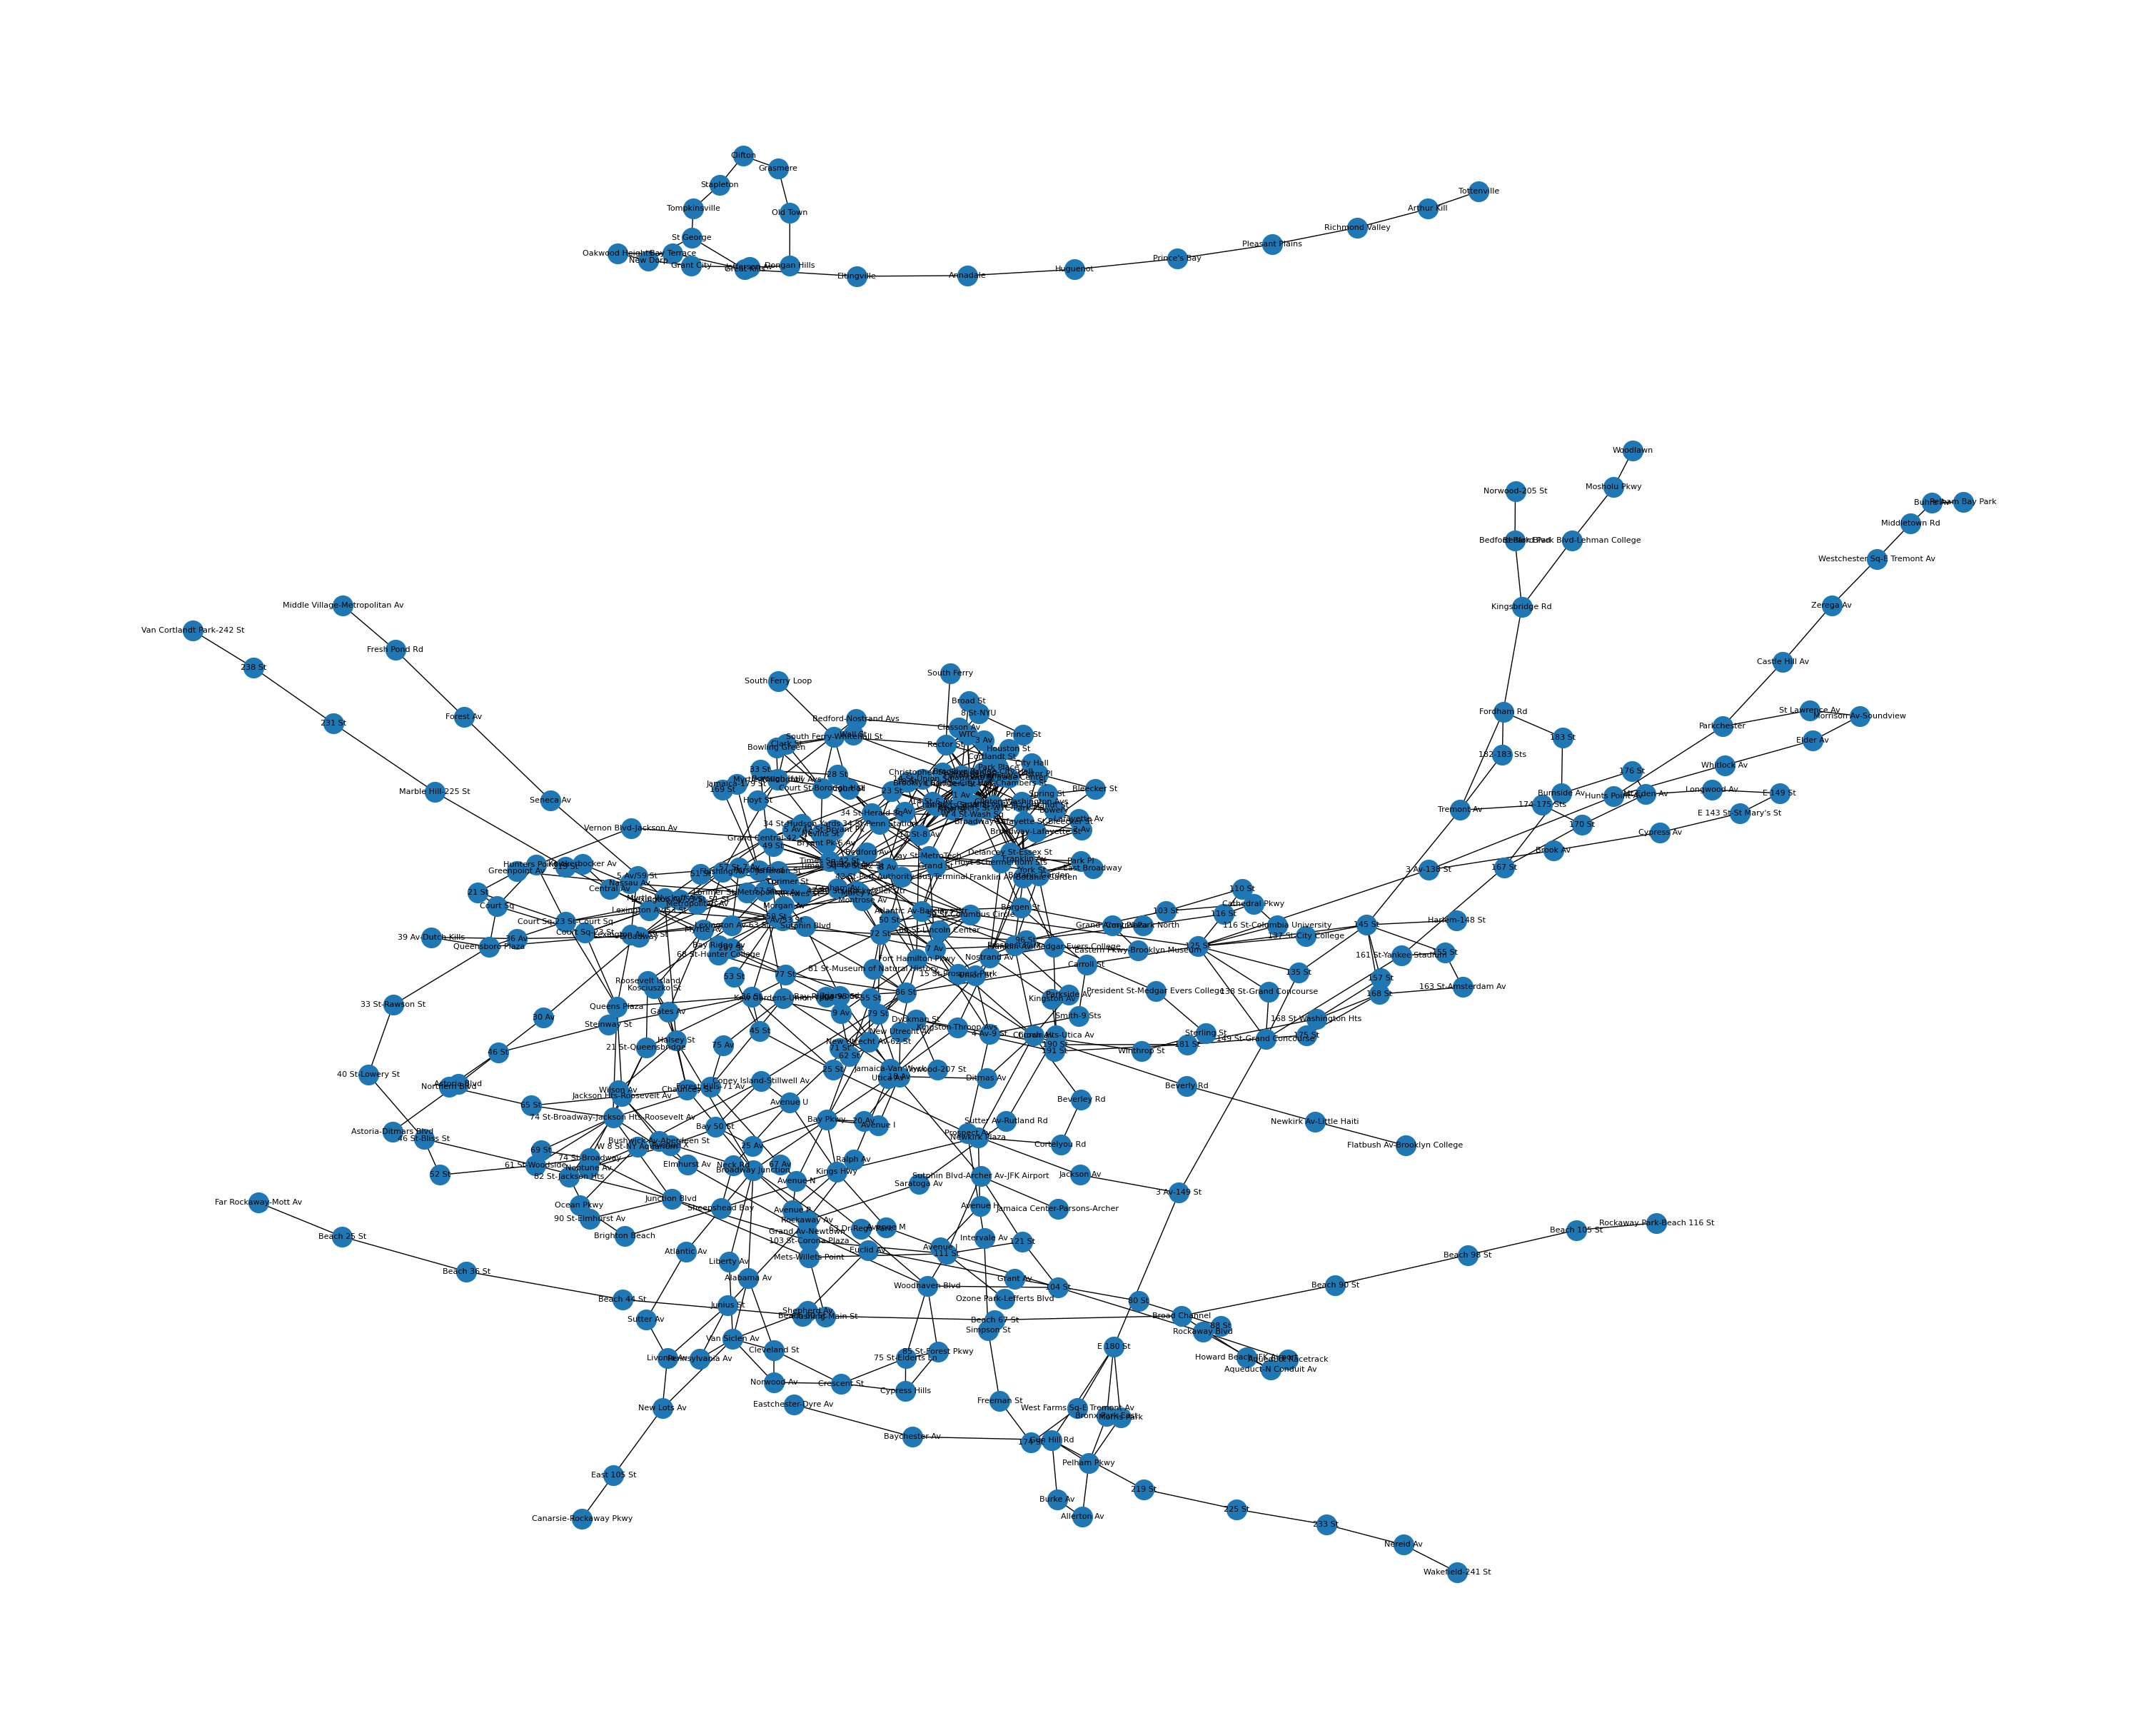

In [12]:
plt.figure(figsize=(30, 24))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=400, font_size=8)
plt.show()
